In [3]:
import os
# import nglview as nv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

# import seaborn as sns
# from hilbertcurve.hilbertcurve import HilbertCurve
from scipy.ndimage import gaussian_filter
from scipy.stats import entropy

#####################################3
import re
import xml.etree.ElementTree as ET
import datetime
from xml.dom import minidom


    
def lig_xml(dic, write_file=False, source=False):
  root = ET.Element('ForceField')
  info = ET.SubElement(root, 'Info')
  info_date = ET.SubElement(info, "date")
  info_date.text = datetime.datetime.now().strftime('%y-%m-%dT%H:%M:%S')
  if source != False: 
    info_file = ET.SubElement(info, 'source')
    info_file.text = source

  data_lig = ET.SubElement(root, 'LIG')
  for i in range(len(dic["name"])):
    tmpattrib={
      "name":dic["name"][i], 
      "type": dic["type"][i], 
      "charge": str(dic["charge"][i]), 
      'penalty': str(dic["penalty"][i]),
    }
    tmpatom = ET.SubElement(data_lig, 'ATOM', attrib = tmpattrib)

  ligxml_str = ET.tostring(root , encoding="unicode")
  dom = minidom.parseString(ligxml_str)
  ligxml_str = dom.toprettyxml()

  if write_file != False :
    with open(write_file, "w") as file1: 
      file1.write(ligxml_str)
  return ligxml_str

def cgenff2dic(filename):
  with open(filename) as file1:
    lst = list(filter(lambda i: re.match(r"^ATOM.*!", i), file1))
  theatom  = [i.strip("\n").split()[1] for i in lst]
  atomtype = [i.strip("\n").split()[2] for i in lst]
  charge   = [float(i.strip("\n").split()[3]) for i in lst]
  penalty  = [float(i.strip("\n").split()[-1]) for i in lst]
  return {"name":theatom, "type":atomtype, "charge":charge, "penalty":penalty}

def cgenff2xmls(cgenffname):
  cgenffdic = cgenff2dic(cgenffname); 
  print(cgenffdic)
  root = ET.Element('ForceField')
  info = ET.SubElement(root, 'Info')
  info_date = ET.SubElement(info, "date")
  info_date.text = datetime.datetime.now().strftime('%y-%m-%dT%H:%M:%S');
  data_lig = ET.SubElement(root, 'LIG')
  for i in range(len(cgenffdic["name"])):
    tmpattrib={
      "name":cgenffdic["name"][i], 
      "type": cgenffdic["type"][i], 
      "charge": str(cgenffdic["charge"][i]), 
      'penalty': str(cgenffdic["penalty"][i]),
    }
    tmpatom = ET.SubElement(data_lig, 'ATOM', attrib = tmpattrib)
  ligxml_str = ET.tostring(root , encoding="unicode")
  ligxml_str = minidom.parseString(ligxml_str).toprettyxml(indent="  ")
  return ligxml_str

def cgenff2xml(cgenffname, outfile):
  xmlstr = cgenff2xmls(cgenffname); 
  with open(outfile, "w") as file1: 
    file1.write(xmlstr)
  return 
  
a="/home/yzhang/Documents/Personal_documents/BetaPose/C022simtemp3/MDL.str"
b="/home/yzhang/Documents/Personal_documents/BetaPose/C022simtemp3/MDL.xml"
cgenff2xml(a, b)


{'name': ['C1', 'C2', 'H3', 'C4', 'C5', 'C6', 'C7', 'N8', 'C9', 'C10', 'N11', 'C12', 'O13', 'C14', 'C15', 'N16', 'C17', 'O18', 'N19', 'C20', 'O21', 'H22', 'H23', 'H24', 'H25', 'H26', 'H27', 'H28', 'H29', 'H30', 'H31', 'H32', 'H33', 'H34'], 'type': ['CG331', 'CG311', 'HGA1', 'CG321', 'CG2R61', 'CG2R61', 'CG2R61', 'NG2R60', 'CG2R61', 'CG2R61', 'NG2S1', 'CG2O1', 'OG2D1', 'CG2R62', 'CG2R62', 'NG2R61', 'CG2R63', 'OG2D4', 'NG2R61', 'CG2R63', 'OG2D4', 'HGA3', 'HGA3', 'HGA3', 'HGA2', 'HGA2', 'HGR61', 'HGR62', 'HGR62', 'HGR61', 'HGP1', 'HGR62', 'HGP1', 'HGP1'], 'charge': [-0.268, -0.131, 0.09, -0.089, -0.004, -0.124, 0.19, -0.598, 0.19, -0.124, -0.262, 0.267, -0.375, -0.035, 0.001, -0.614, 0.321, -0.433, -0.264, 0.634, -0.435, 0.09, 0.09, 0.09, 0.09, 0.09, 0.115, 0.122, 0.122, 0.115, 0.313, 0.138, 0.331, 0.357], 'penalty': [2.449, 2.67, 0.0, 2.941, 2.182, 0.0, 0.0, 0.0, 0.0, 0.0, 1.644, 28.001, 0.075, 33.354, 1.225, 0.0, 0.0, 0.0, 3.984, 34.197, 24.168, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [4]:
import re
import xml.etree.ElementTree as ET
import datetime
from xml.dom import minidom

def rtp2xml(rtpfile): 
  with open(rtpfile, "r") as file1:
    residues = [];
    newres="";
    inres = 0
    for i in file1:
      i = re.sub(";.*", "", i)
      if len(i) < 4:
        continue
      if ("[" in i) and (not re.search(r"bondedtypes|cmap|impropers|bonds|atoms", i)):
        inres = 1
        if len(newres) > 0:
          residues.append(newres);
          newres=''
      if inres ==1: 
        newres += i;
    residues.append(newres);
  dic = {}
  for i in residues:
    restitle = i.split("\n")[0].split()[1];
    dic[restitle] = {"name":[], "type": [], "charge":[]}
    inatom = 0; 
    for line in i.strip("\n").split("\n"): 
      if re.search(r"\[.*atoms.*\]", line):
        inatom = 1; 
        continue
      elif re.search(r"\[.*\]", line):
        inatom = 0;  
        continue
      if inatom == 1:
        thisline = line.strip().split(); 
        dic[restitle]["name"].append(thisline[0])
        dic[restitle]["type"].append(thisline[1])
        dic[restitle]["charge"].append(float(thisline[2]))
  root = ET.Element('ForceField')
  info = ET.SubElement(root, 'Info')
  info_date = ET.SubElement(info, "date")
  info_date.text = datetime.datetime.now().strftime('%y-%m-%dT%H:%M:%S');
  for res in dic.keys():
    if re.search(r"^[0-9]", res) or len(res) >= 5:
      # Tagnames start with a number is illegal tagnames
      # print(f"Skipping {res}")
      continue
    data_lig = ET.SubElement(root, res); 
    for i in range(len(dic[res]["name"])):
      tmpattrib={
        "name":dic[res]["name"][i], 
        "type": dic[res]["type"][i], 
        "charge": str(dic[res]["charge"][i]), 
      }
      tmpatom = ET.SubElement(data_lig, 'ATOM', attrib = tmpattrib)
  finalstr = ET.tostring(root , encoding="unicode")
  finalstr = minidom.parseString(finalstr).toprettyxml(indent="  ")
  with open("/tmp/test1.xml", "w") as file1: 
    file1.write(finalstr)
  
a = "/home/yzhang/Documents/Personal_documents/BetaPose/C022simtemp3/charmm36-feb2021.ff/merged.rtp"
rtp2xml(a)

In [73]:

class ChargeParser:
  def __init__(self, topology):
    # self.domff = minidom.parse(ff)
    # self.residues = self.domff.getElementsByTagName("Residue")
    self.residuemap = {
      "TIP3":"T3P",
      "HOH":"T3P",
      "WAT":"T3P",
      'HID':"HSD",
      'HIE':"HSE",
      'HIP':"HSP", 
      "CYX":"CYS",
    }
    self.atommap = {
      "H": "HN",
      "O1":"OT1",
      "O2":"OT2",
      "HD11":"HD1",
      "HD12":"HD2",
      "HD13":"HD3",
    }
    # self.map_resnames()
    self.top = topology; 
    self.residuelist = [i.name for i in self.top.residues] + ["NME", "ACE", "FOR", "NH2"]; 
    self.residueset = [i for i in set(self.residuelist)]; 
    
    self.chargedic = {}; 
    self.chargemap = ET.Element('ForceField'); 
    info = ET.SubElement(self.chargemap, 'Info'); 
    info_date = ET.SubElement(info, "date"); 
    info_date.text = datetime.datetime.now().strftime('%y-%m-%dT%H:%M:%S');
    
    
  def chargefrompatch(self, resname, patchdic):
    assert "name" in patchdic.keys(), "<name> should be in the patch dictionary"
    assert "charge" in patchdic.keys(), "<charge> should be in the patch dictionary"
    data_lig = ET.SubElement(self.chargemap, "Residue", attrib = {"name":resname}); 
    for i in range(len(patchdic["name"])):
      tmpattrib={
        "name": patchdic["name"][i], 
        "type": patchdic["type"][i], 
        "charge": str(patchdic["charge"][i]), 
      }
      tmpatom = ET.SubElement(data_lig, 'Atom', attrib = tmpattrib)
  
  def chargefromcgenff(self, resname, cgenfffile): 
    """
      TODO: Where is the cgenff2dic function
    """
    dic = cgenff2dic(cgenfffile)
    self.chargefrompatch(resname, dic)
    
  def chargefromrtp(self, rtpfile): 
    with open(rtpfile, "r") as file1:
      residues = [];
      newres="";
      inres = 0
      for i in file1:
        i = re.sub(";.*", "", i)
        if len(i) < 4:
          continue
        if ("[" in i) and (not re.search(r"bondedtypes|cmap|impropers|bonds|atoms", i)):
          inres = 1
          if len(newres) > 0:
            residues.append(newres);
            newres=''
        if inres ==1: 
          newres += i;
      residues.append(newres);
    dic = {}
    for i in residues:
      restitle = i.split("\n")[0].split()[1];
      if restitle not in self.residueset:
        continue
      dic[restitle] = {"name":[], "type": [], "charge":[]}
      inatom = 0; 
      for line in i.strip("\n").split("\n"): 
        if re.search(r"\[.*atoms.*\]", line):
          inatom = 1; 
          continue
        elif re.search(r"\[.*\]", line):
          inatom = 0;  
          continue
        if inatom == 1:
          thisline = line.strip().split(); 
          dic[restitle]["name"].append(thisline[0])
          dic[restitle]["type"].append(thisline[1])
          dic[restitle]["charge"].append(float(thisline[2]))
    for key, val in dic.items():
      self.chargefrompatch(key, val)
  
  def chargefromxml(self, xmlfile): 
    xmlff = minidom.parse(xmlfile);
    residues = xmlff.getElementsByTagName("Residues")
    residues = residues[0].getElementsByTagName("Residue")
    for i in residues:
      thedic = {"name":[], "type": [], "charge":[]}
      resname = i.attributes["name"].value
      if resname not in self.residueset:
        continue
      thedic["name"] = [_.attributes["name"].value for _ in i.getElementsByTagName("Atom")]
      thedic["type"] = [_.attributes["type"].value for _ in i.getElementsByTagName("Atom")]
      thedic["charge"] = [_.attributes["charge"].value for _ in i.getElementsByTagName("Atom")]
      self.chargefrompatch(resname, thedic)

  def chargefrommol2(self): 
    pass
  
  def check_topology(self):
    self.chargedic = self.todic(); 
    atomtypelst = []; 
    for i in self.top.atoms:
      atomname = i.name
      atmid = f"{self.residuelist[i.resid]}_{atomname}"
      if atmid not in atomtypelst:
        atomtypelst.append(atmid); 
        if self.residuelist[i.resid] in self.chargedic.keys(): 
          names = self.chargedic[self.residuelist[i.resid]]["name"]
          if atomname not in names:
            if atomname in self.atommap.keys():
              if self.atommap[atomname] not in names:
                print(f"Not found the atom {self.residuelist[i.resid]}_{atomname}; "); 
            else: 
              print(f"Not found the atom {self.residuelist[i.resid]}_{atomname}; "); 
        
            
  def todic(self):
    chargedic = {}
    ff = BeautifulSoup(self.xml, 'xml'); 
    for resname in self.residueset:
      residue = ff.find("Residue", {"name":resname})
      if residue and len(residue) > 0:
        chargedic[resname] = {}
        atoms = residue.find_all("Atom")
        chargedic[resname]["name"] = [i['name'] for i in atoms]
        chargedic[resname]["charge"] = [float(i['charge']) for i in atoms]
      else: 
        print(f"Not found the residue: {resname}")
    return chargedic
  
  def printxml(self):
    finalstr = ET.tostring(self.chargemap , encoding="unicode")
    finalstr = minidom.parseString(finalstr).toprettyxml(indent="  ")
    print(finalstr)
    
  @property
  def xml(self):
    finalstr = ET.tostring(self.chargemap , encoding="unicode"); 
    finalstr = minidom.parseString(finalstr).toprettyxml(indent="  "); 
    return finalstr; 

    
  def map_resnames(self):
    reslst = [i.getAttribute("name") for i in self.residues]
    for i in reslst: 
      if i in self.residuemap.keys():
        print(f"mapping residue {i}")
        idx = reslst.index(i)
        self.residues[idx].setAttribute("name", self.residuemap[i])
    self.residues = self.domff.getElementsByTagName("Residue")
    
  def map_atomname(self):
    pass

  def format_resname(self, resname):
    resname = resname.upper()
    if resname in self.residuemap.keys():
      resname = self.residuemap[resname]
    return resname

  def format_atomname(self, retdic):
    keys = retdic.keys()
    values = retdic.values()
    return {i:j for i,j in zip(keys, values)}

  def getTypes(self, resname):
    # TODO: possible changes to map the residue name 
    # TODO: map HIS/HIE/HID, CYX, etc
    resname = self.format_resname(resname);
    for i in self.residues: # self.domff.getElementsByTagName("Residue"):
      if i.attributes["name"].value == resname:
        names = [_.attributes["name"].value for _ in i.getElementsByTagName("Atom")]
        types = [_.attributes["type"].value for _ in i.getElementsByTagName("Atom")]
        break
    ret = {i:j for i,j in zip(names, types)}
    return self.format_atomname(ret)

  def getCharges(self, resname):
    # TODO: possible changes to map the residue name 
    # TODO: map HIS/HIE/HID, CYX, etc
    resname = self.format_resname(resname); 
    for i in self.residues: 
      if i.attributes["name"].value == resname:
        names = [_.attributes["name"].value for _ in i.getElementsByTagName("Atom")]
        charges = [_.attributes["charge"].value for _ in i.getElementsByTagName("Atom")]
        break
    ret = {i:float(j) for i,j in zip(names, charges)}
    return self.format_atomname(ret)

  def getAtomCharge(self, resname, atomname):
    resname = self.format_resname(resname); 
    found_res = False
    for i in self.residues: 
      if i.attributes["name"].value == resname:
        names = [_.attributes["name"].value for _ in i.getElementsByTagName("Atom")]; 
        charges = [_.attributes["charge"].value for _ in i.getElementsByTagName("Atom")]; 
        found_res = True;
        break
    if found_res: 
      found_atom = False;
      for i,j in zip(names, charges):
        if i == atomname: 
          return float(j); 
          found_atom = True; 
          break
      if not found_atom:
        print(f"Found the residue {resname}, however, Not found the atom {atomname}"); 
        return 0; 
    else : 
      print(f"Not found the residue {resname}")
      return 0; 

  def addFF(self, ff, waitlist=[]):
    # use minidom purely
    residues_oldff = self.domff.getElementsByTagName('Residues')
    newff = minidom.parse(ff)
    residues_newff = newff.getElementsByTagName('Residue')
    for i in residues_newff:
      if len(waitlist) == 0 or i.getAttribute("name") in waitlist:
        residues_oldff[0].appendChild(i)
      else: 
        pass
    self.residues = self.domff.getElementsByTagName("Residue")
    self.map_resnames()

import pytraj as pt
from bs4 import BeautifulSoup

cgenfffile="/home/yzhang/Documents/Personal_documents/BetaPose/C022simtemp3/MDL.str"
patch = {'name': ['C1', 'C2', 'H3', 'C4', 'C5', 'C6', 'C7', 'N8', 'C9', 'C10', 'N11', 'C12', 'O13', 'C14', 'C15', 'N16', 'C17', 'O18', 'N19', 'C20', 'O21', 'H22', 'H23', 'H24', 'H25', 'H26', 'H27', 'H28', 'H29', 'H30', 'H31', 'H32', 'H33', 'H34'], 'type': ['CG331', 'CG311', 'HGA1', 'CG321', 'CG2R61', 'CG2R61', 'CG2R61', 'NG2R60', 'CG2R61', 'CG2R61', 'NG2S1', 'CG2O1', 'OG2D1', 'CG2R62', 'CG2R62', 'NG2R61', 'CG2R63', 'OG2D4', 'NG2R61', 'CG2R63', 'OG2D4', 'HGA3', 'HGA3', 'HGA3', 'HGA2', 'HGA2', 'HGR61', 'HGR62', 'HGR62', 'HGR61', 'HGP1', 'HGR62', 'HGP1', 'HGP1'], 'charge': [-0.268, -0.131, 0.09, -0.089, -0.004, -0.124, 0.19, -0.598, 0.19, -0.124, -0.262, 0.267, -0.375, -0.035, 0.001, -0.614, 0.321, -0.433, -0.264, 0.634, -0.435, 0.09, 0.09, 0.09, 0.09, 0.09, 0.115, 0.122, 0.122, 0.115, 0.313, 0.138, 0.331, 0.357], 'penalty': [2.449, 2.67, 0.0, 2.941, 2.182, 0.0, 0.0, 0.0, 0.0, 0.0, 1.644, 28.001, 0.075, 33.354, 1.225, 0.0, 0.0, 0.0, 3.984, 34.197, 24.168, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.258, 1.188, 0.0, 0.0]}
rtp = "/home/yzhang/Documents/Personal_documents/BetaPose/C022simtemp3/charmm36-feb2021.ff/merged.rtp"
xmlfile="/home/yzhang/Documents/Personal_documents/BetaPose/Forcefield/charmm36_nowaters.xml"

traj = pt.load("/home/yzhang/Documents/Personal_documents/BetaPose/C022simtemp3/C022simtemp3_PDB.pdb")

chargeparser = ChargeParser(traj.top)
chargeparser.chargefromrtp(rtp)
chargeparser.chargefromxml(xmlfile)
chargeparser.chargefromcgenff("LIG", cgenfffile)
# chargeparser.chargefromcgenff("LIG", cgenfffile)
# chargeparser.printxml()
chargeparser.check_topology()



Not found the residue: T3P
Not found the residue: K+
Not found the residue: CL-
Not found the atom ASP_H1; 
Not found the atom ASP_H2; 
Not found the atom ASP_H3; 
Not found the atom GLN_O1; 
Not found the atom GLN_O2; 


In [5]:
import time
import pickle 
import numpy as np 
import pytraj as pt 
import matplotlib.pyplot as plt

from scipy.spatial import distance_matrix
from scipy.ndimage import gaussian_filter
from scipy.stats import entropy

from BetaPose import utils

# Forcefield and xml related functions
import re
from xml.dom import minidom
import xml.etree.ElementTree as ET

tmptop = pt.load("./tests/featurizer_test1.pdb")
def getprotein(traj):
  reslst = []
  for i in traj.top.atoms:
    if i.name=="CA":
      reslst.append(i.resid+1)
  mask = ":"+",".join([str(i) for i in reslst])
  return traj.top.select(mask)

  
a = utils.getprotein(tmptop)
# print((a+1).astype(str).tolist()+a.tolist())



In [127]:
import pickle
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
import nglview as nv 
import pytraj as pt
%matplotlib
# %nglview
class feature_3d_reader:
  def __init__(self, pickleFile):
    # Generate the 2D/3D hilbert curve
    with open(pickleFile, "rb") as file1:
      featuredic = pickle.load(file1)
      print(featuredic.keys()); 
      self.distances = featuredic["distances"]; 
      self.length3D  = featuredic["length3D"];
      self.points3D  = featuredic["points3D"]; 
      self.index3D   = featuredic["index3D"];
      self.features  = featuredic["features"];

      self.atom_groups = featuredic["atom_groups"]; 
      self.frameList = featuredic["frameList"]
      self.frameNr   = featuredic["frameNr"]
      if "element" in self.features:
        self.atom_mass  = featuredic["atom_mass"]
        self.norm_mass  = featuredic["norm_mass"]
        self.gauss_mass = featuredic["gauss_mass"]
      if "entropy" in self.features:
        self.entropy = featuredic["entropy"]
        self.gauss_entropy = featuredic["gauss_entropy"]
      if "charge" in self.features:
        self.atom_charge  = featuredic["atom_charge"]; 
        self.gauss_charge = featuredic["gauss_charge"]; 
        
  def selectData(self, maintype, select_group, subtype="gauss"):
    if maintype == "element":
      if subtype == "atom":
        data = self.atom_mass[select_group]; 
      elif subtype == "norm":
        data = self.norm_mass[select_group]; 
      elif subtype == "gauss": 
        data = self.gauss_mass[select_group]; 
      else: 
        print(f"Not Found the subtype {subtype}"); 
        data = self.gauss_mass[select_group]; 
    elif maintype == "entropy":
      if subtype == "gauss":
        data = self.gauss_entropy; 
      else:
        data = self.entropy; 
    elif maintype == "charge":
      if subtype == "atom":
        data = self.atom_charge[select_group]; 
      elif subtype == "gauss": 
        data = self.gauss_charge[select_group]; 
      else: 
        print(f"Not Found the subtype {subtype}"); 
        data = self.gauss_charge[select_group]; 
    return data
  
  def scatter3D(self, maintype, select_group, indice=0, subtype="gauss", cmap="Blues", threshold=0.1):
    thedata = self.selectData(maintype, select_group, subtype=subtype);
    if maintype == "element":
      thedata = thedata[indice]

    fig = plt.figure(); 
    ax = fig.add_subplot(projection='3d'); 
    plt.ion(); 

    thecmap = cm.get_cmap(cmap)
    print(thedata.shape)
    for i in self.distances: 
      theindex = tuple(self.index3D[i]); 
      theposition = self.points3D[i]; 
      v = thedata[theindex]
      thecolor = thecmap(v)
      # print(f"point: {i}, value: {v}, color: {thecolor}")
      if v > threshold:
        ax.scatter(*theposition, color=thecolor)

  def gen_pdbstr(self, coordinates, elements=None, bf=[]):
    if elements == None: 
      elements = ["Du"]*len(coordinates)
    if len(coordinates) != len(bf):
      print("length not aligned")
    pdbline = ""
    tempstr = "ATOM      1  Du  TMP     1       0.000   0.000   0.000  1.00  0.00";
    coordinates = np.round(coordinates, decimals=3)
    for i in range(len(coordinates)):
      if len(bf) != 0: 
        bfval = bf[i]
      else: 
        bfval = 0.00
      point = coordinates[i]; 
      elem  = elements[i]; 
      tmpstr = "".join(["{:>8}".format(i) for i in point]); 
      tmpstr = "".join([f"{i:>8}" for i in point]); 
      thisline = f"ATOM  {i:>5}  {elem:<3}{tempstr[16:30]}{tmpstr}{tempstr[54:60]}{round(bfval,2):>6}\n"
      pdbline += thisline
    return pdbline

  def filter_coor(self, maintype, select_group, threshold, mode="gt", indice=0, subtype="gauss"):
    thedata = self.selectData(maintype, select_group, subtype=subtype);
    if maintype == "element" or maintype == "charge":
      thedata = thedata[indice]
    if mode == "gt":
      status = thedata > float(threshold)
    elif mode == "lt":
      status = thedata < float(threshold)
    elif mode == "mid":
      threshold1 = float(threshold.split(",")[0])
      threshold2 = float(threshold.split(",")[1])
      status1 = thedata >= threshold1
      status2 = thedata <= threshold2
      status = status1 * status2
    elif mode == "out":
      threshold1 = float(threshold.split(",")[0])
      threshold2 = float(threshold.split(",")[1])
      status1 = thedata < threshold1
      status2 = thedata > threshold2
      status = np.logical_or(status1, status2)
    filtered = thedata[status]
    print(f"there are {np.count_nonzero(status)} non-zero values")
    print(f"Filtered data: mean:{np.mean(filtered):2f}, Std:{np.std(filtered):2f}, Max:{np.max(filtered):2f}, Min:{np.min(filtered):2f}")
    coorlist = []
    for i in self.distances: 
      theindex = tuple(self.index3D[i]); 
      if status[theindex] == True:
        coorlist.append(self.points3D[i])
    return np.array(coorlist), filtered

  def write_pdb(self, pdblines, pdbfile="./test.pdb"):
    with open(pdbfile, "w") as file1:
      file1.write(pdblines)
    return pdbfile
        
reader = feature_3d_reader("test_featurizer_3D.pkl")

# print(reader.selectData("charge", "ligand", subtype="atom"))

points, filtered_vals = reader.filter_coor("charge", "ligand", "-0.05,0.05", indice=0, mode = "out", subtype="atom")
print(points.shape, len(filtered_vals))
tmppdb = reader.gen_pdbstr(points, bf=filtered_vals)
reader.write_pdb(tmppdb)
viewer = nv.show_text(tmppdb)

traj1 = pt.load("test_featurizer.pdb")

def sel_conv(traj, mask):
  return f"@{','.join(traj.top.select(mask).astype(str))}"


viewer.add_component("test_featurizer.pdb")
viewer[0].clear_representations()
viewer[0].add_representation("line", color="bfactor", opacity=0.6, pointSize=0.7)
viewer[1].clear_representations()
viewer[1].add_representation("cartoon", selection="protein", color="#bbe1fa")
# viewer[1].add_representation("licorice", selection="protein")
selstr = sel_conv(traj1, ":113-120")
viewer[1].add_representation("line", selection=selstr, radius=4, zOffset=0, xOffset=0.5,yOffset=0.5)
selstr = sel_conv(traj1, ":LIG")
viewer[1].add_representation("ball+stick", selection=selstr)
viewer

# reader.scatter3D("entropy", "all", subtype="gauss", cmap="Reds", threshold=0.3); 



Using matplotlib backend: Qt5Agg
dict_keys(['frameNr', 'frameList', 'atom_groups', 'distances', 'length3D', 'index3D', 'points3D', 'features', 'atomic_names', 'atomic_number', 'atom_mass', 'norm_mass', 'gauss_mass', 'entropy', 'gauss_entropy', 'atom_charge', 'gauss_charge'])
there are 651 non-zero values
Filtered data: mean:-0.010184, Std:0.387488, Max:0.500000, Min:-0.773000
(651, 3) 651


NGLWidget()

In [ ]:
REPRESENTATION_NAME_PAIRS = [
    ('axes', 'axes'),            # Shows the three pairs of ellipse axes
    ('principal_axes', 'axes'),  # Not work well. Should be used in another way
    ('point', 'point'),          # Cubic point
    ('line', 'line'),            # Dummy atoms as cross, other structures are normal
    ('rope', 'rope'),            # A normal representation on ONLY protein structure 
    ('tube', 'tube'),            # A normal representation on ONLY protein structure (relative thin)
    ('trace', 'trace'),          # A normal representation on ONLY protein structure (very thin line)
    ('label', 'label'),          # Very interesting labels
    ('slice', 'slice'),          # Not work well. Should be used in another way
    ('unitcell', 'unitcell'),    # Unit cell of the PDB
    ('cartoon', 'cartoon'),      # A normal representation on ONLY protein structure 
    ('licorice', 'licorice'),    # A normal representation on ALL structure 
    ('distance', 'distance'),    # Not work well. Should be used in another way
    ('ribbon', 'ribbon'),        # A normal representation on ONLY protein structure 
    ('surface', 'surface'),      # SURFACE
    ('backbone', 'backbone'),    # A normal representation on ONLY protein structure 
    ('contact', 'contact'),      # Hydrogen bond interaction 
    ('hyperball', 'hyperball'),  # A normal representation on ALL structure 
    ('rocket', 'rocket'),        # A SPECIAL representation on ONLY protein structure 
    ('helixorient', 'helixorient'), # A SPECIAL representation on ONLY protein structure and ONLY alpha-Helix
    ('simplified_base', 'base'), # Not work well. Should be used in another way
    ('spacefill', 'spacefill'),  # SPHERE
    ('ball_and_stick', 'ball+stick'),  # BALL+STICK
]

In [1]:
from scipy.stats import entropy

def get_entropy(arr):
  unique, counts = np.unique(arr, return_counts=True)
  return entropy(counts)

lst1 = [0, 0, 0, 3, 0, 0, 0, 4, 3, 2 , 0, 0, 0, 3, 0]
lst2 = [i for i in set(lst1)]
print(get_entropy(lst1))
print(get_entropy(lst2))

NameError: name 'np' is not defined

In [152]:
x=reader.gauss_entropy.reshape((-1,8000)).squeeze()
bins = np.linspace(0,0.7,15)

print(bins)

def plt_hist(data, n_bins): 
  fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)
  N, bins, patches = ax.hist(data, bins=n_bins)
  return fig, ax, N, bins, patches
plt_hist(x, n_bins=bins)

NameError: name 'reader' is not defined

Calculating pairwise distance
Pairing:   N1( 41106) -    O(   632)
Pairing:   C1( 41107) -    O(   632)
Pairing:   C4( 41108) -    N(  3123)
Pairing:   O1( 41109) -    N(  3138)
Pairing:   O2( 41110) -   CB(  3115)
Pairing:   C2( 41111) -    O(   632)
Pairing:   C3( 41112) -    O(  1837)
Pairing:   S1( 41113) -    O(  1856)
Pairing:   C5( 41114) -    O(  1856)
Pairing:   C6( 41115) -    O(   632)
Pairing:   O3( 41116) -   CA(   630)
Pairing:   C9( 41117) -   CA(   630)
Pairing:   N2( 41118) -   CA(   630)
Pairing:  C14( 41119) -   CB(   985)
Pairing:   N6( 41120) -    N(   979)
Pairing:  C13( 41121) -    O(  1480)
Pairing:  C10( 41122) -   CB(   985)
Pairing:   N3( 41123) -   CB(   985)
Pairing:  C11( 41124) -   CB(   985)
Pairing:   N5( 41125) -    N(  1502)
Pairing:  C12( 41126) -    N(  1502)
Pairing:   N4( 41127) -    N(  1502)
Pairing:   C8( 41128) -   CA(   630)
Pairing:   O5( 41129) -    N(   979)
Pairing:   C7( 41130) -   CA(   648)
Pairing:   O4( 41131) -   CA(   648)
The foll

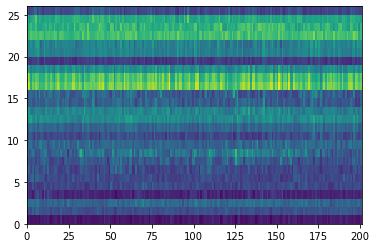

In [8]:
from BetaPose import utils, cluster
import pytraj as pt 
import numpy as np 
import matplotlib.pyplot as plt 

a="/home/miemie/Dropbox/Documents/BetaPose/tests/featurizer_test1.pdb"; 
b="/home/miemie/Dropbox/Documents/BetaPose/tests/featurizer_test1.nc"; 
traj = pt.load(b, top=a); 
traj.top.set_reference(traj[0]); 
pdist, y = utils.PairwiseDistance(traj, ":LIG&!@H=", ":LIG<@6&!:LIG&@C,CA,CB,N,O",use_mean=True); 

plt.pcolormesh(pdist)
clusters = cluster.ClusterAgglomerative(pdist, 10)
cluster_rand = cluster.RandomPerCluster(clusters, number=1)
print("The following frames are selected", cluster_rand)
# cluster.RMSDClusters(clusters, a, b); 
# cluster.RMSDGroup(cluster_rand, a, b); 




(26, 201)
[0 0 3 ... 2 3 2] 201


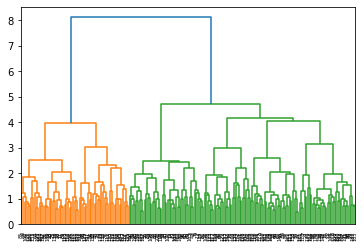

In [6]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

pdist

# pair_dist_sel = np.concatenate((dist_details["lig_atomids"], dist_details["pro_atomids"]))
# selrms = pt.rmsd(traj, mask="@"+",".join(pair_dist_sel.astype(str)))

# print(pair_dist_sel, len(pair_dist_sel))
# print(selrms)

clusterNr = 10
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(pdist.T, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=clusterNr, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict([pdist[:,i] for i in range(len(pdist.T))])
bins = np.unique(y_hc)
print(pdist.shape)
print(y_hc, len(y_hc))

In [27]:
import tmtools
from Bio.PDB.Polypeptide import three_to_one
print(dir(tmtools))

from tmtools.io import get_structure, get_residue_data
get_structure("/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/1ctu/1ctu_protein.pdb")
def sanitizeres(seq):
  mapping = {
    "HSD":"HIS","HSE":"HIS","HSP":"HIS","HID":"HIS","HIE":"HIS","HIP":"HIS",
  }
  outlst = []
  for i in seq: 
    if i in mapping.keys():
      outlst.append(mapping[i])
    else: 
      outlst.append(i)
  return outlst
def getseq(traj1, mask=":*"):
  cas = traj1.top.select(f"@CA&{mask}")
  caatoms = np.array([*traj1.top.atoms])[cas]
  resids = np.array([i.resid for i in caatoms])
  residues = np.array([*traj1.top.residues])[resids]
  res_three = sanitizeres([i.name for i in residues]); 
  res_one = [three_to_one(i) for i in res_three]; 
  return "".join(res_one)
def GetCACoord(traj1, idx, mask=":*"):
  return traj.xyz[idx][traj.top.select(f"@CA&{mask}")]
def GetMeanCACoord(traj1, mask=":*"):
  return np.mean(traj.xyz, axis=0)[traj.top.select(f"@CA&{mask}")]
  
print(GetMeanCACoord(traj).shape)

theseq = getseq(traj, ":LIG<:6")
print(theseq)
print(traj.xyz.shape)
tm_scores=[]
for i in range(len(traj.xyz)):
  tmout = tmtools.tm_align(GetMeanCACoord(traj, ":LIG<:6"), GetCACoord(traj,i, ":LIG<:6"), theseq,theseq)
  tm_scores.append(tmout.tm_norm_chain1)
tm_scores=np.array(tm_scores)
print(np.std(tm_scores))
clust_tm = ClusterAgglomerative(tm_scores.reshape(1, -1) , 10)
print(clust_tm)

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_bindings', 'io', 'tm_align']
(221, 3)
DIGCGYGGLLEIRVSNAMKFLFPDHWITEEGK
(201, 41152, 3)
0.02903432057592061
[8 1 1 ... 1 7 6]


In [155]:
def ClusterAgglomerative(pdist, clusternr):
  """
    Cluster the distance values to {clusternr} classes
    [0 0 3 ... 2 3 2]  # 10 classes
  """
  hc = AgglomerativeClustering(n_clusters=clusternr, affinity = 'euclidean', linkage = 'ward'); 
  y_hc = hc.fit_predict(pdist.T); 
  return y_hc

def RandomPerCluster(cluster, number=1):
  """
    Choose {number} data points from each cluster
  """
  retlst = []
  for gp in np.unique(cluster):
    gp1 = [i for i,j in enumerate(cluster) if j == gp]; 
    randidx = np.random.choice(gp1, number)
    if number ==1: 
      retlst.append(int(randidx))
    elif number >1: 
      retlst += list(randidx)
  retlst.sort()
  return retlst

def RMSDClusters(cluster, pdbfile, trajfile):
  """
    Caluclate the RMSD values of the each clusters
    Examine the quality of clusters
  """
  rmsdlst=[]
  for gp in np.unique(cluster):
    gp1 = [i for i,j in enumerate(cluster) if j == gp]; 
    traj1 = pt.load(trajfile, top=pdbfile, frame_indices=gp1);
    traj1.superpose("@CA")
    print(f"Cluster {gp}: Selected frames: {len(gp1)} frames "); 
    #     print("==>", tm_scores[gp1])
    #     print("==>", np.std(tm_scores[gp1]))
    gprmsd = pt.rmsd(traj1, ":LIG&!@H="); 
    gpgyr = pt.radgyr(traj1, ":LIG&!@H="); 
    print(f"RMSD: {gprmsd.mean()}-{gprmsd.std()}\nROG: {gpgyr.mean()}-{gpgyr.std()}")
    rmsdlst.append(gprmsd.mean())
  print(f"Average RMSD: {np.mean(rmsdlst)}\n")
  return rmsdlst

def RMSDGroup(frames, pdbfile, trajfile):
  """
    Caluclate the RMSD values of certain frames 
    Examine the quality of clusters
  """
  traj1 = pt.load(trajfile, top=pdbfile, frame_indices=frames);
  rmsds = pt.rmsd(traj1, ":LIG&!@H="); 
  print(f">>> RMSD: {rmsds.mean()}-{rmsds.std()}\n")
  return rmsds
  

    
a="/home/miemie/Dropbox/Documents/BetaPose/tests/featurizer_test1.pdb"; 
b="/home/miemie/Dropbox/Documents/BetaPose/tests/featurizer_test1.nc";
x = ClusterAgglomerative(pdist, 10)
# x = clust_tm; 
# print([i for i in x])

RMSDClusters(x,a,b)
randnr = np.random.choice(np.arange(len(x)), size=10, replace=False)
randnr.sort()
print("Ramdom frames", [i for i in randnr])
RMSDGroup(randnr,a,b)
print("All frames: ")
RMSDGroup(range(len(x)),a,b)
print("Each from one cluster: ")
cluster_rand = RandomPerCluster(x, number=1)
print(cluster_rand)
RMSDGroup(cluster_rand,a,b)


NameError: name 'pdist' is not defined

In [68]:
from BetaPose import cluster
cluster.ClusterAgglomerative(pdist, 10)
cluster.RMSDClusters(x,a,b)

NameError: name 'np' is not defined

In [154]:
lst = []
for i in range(100): 
  randnr = np.random.choice(np.arange(len(x)), size=10, replace=False)
  randnr.sort()
  print("Ramdom frames", [i for i in randnr])
  rmsds = RMSDGroup(randnr,a,b)
  lst.append(rmsds.mean())
print(np.mean(lst))
plt.scatter(clust_tm, tm_scores)
# tm_scores=np.array(tm_scores)
# clust_tm

NameError: name 'x' is not defined

In [9]:
import numpy as np

# Generate random 3D points
points = np.ra;pndom.rand(100, 3)
print(points)

# Define grid dimensions
N = 10

# Determine bounds of the grid
min_coords = np.min(points, axis=0)
max_coords = np.max(points, axis=0)

# Calculate grid cell size
grid_size = (max_coords - min_coords) / N

# Initialize the grid
grid = np.zeros((N, N, N))

# Calculate the centers of grid cells
grid_centers = min_coords + grid_size / 2 + np.indices((N, N, N)).T * grid_size

# Loop through points
for point in points:
    # Calculate distances to grid cell centers
    distances = np.linalg.norm(grid_centers - point, axis=-1)
    print(distances.shape)

    # Avoid division by zero
    distances[distances == 0] = 1e-10

    # Compute weights based on inverse distance
    weights = 1 / distances  # NOTE: weight i rather than 1
    print(weights.shape)
    # Normalize weights
    weights = weights / np.sum(weights)    # NOTE: write a correct way to normalize the weights

    # Add weights to grid
    grid += weights

# Normalize the grid
grid = grid / np.sum(grid)


[[0.76885691 0.3290084  0.68473687]
 [0.06532822 0.54418812 0.83369545]
 [0.78620663 0.12482506 0.2041556 ]
 ...
 [0.12372266 0.09548518 0.78848518]
 [0.46308196 0.53507464 0.34761338]
 [0.46993386 0.02756553 0.7185433 ]]
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10)
(10, 10, 10

# Available Modules: 
## - TRAJ Class for trajectory manipulation (For user end)
## - TrajectoryLoader trajectory iteration (For user end)
## - Representation generator (For developer end only)

<br>

# Modules to be Added 
## - Feature generator (For user end)
## - Database depositor (For developer end only)
## - Temporary Data storage (For developer end only)
## - Neural networks 

In [36]:
from BetaPose import trajloader

trajs = "/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_001_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_002_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_003_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_004_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_005_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_006_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_007_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_008_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_009_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_010_traj.nc%"
trajs = trajs.strip("%").split("%")
tops = ["/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_010_END.pdb"] * 10
tloader = trajloader.TrajectoryLoader(trajs, tops)


# tloader[3:]
for traj in tloader[:3]:
  print(type(traj))
  
  break
  
  
  
for traj in tloader: 
  # Complete the trajectory information
  traj.addcharge(); 
  
  # Initialize the featurizer since different trajectory might have distinct parameters
  feat  = featurizer_3d(FEATURIZER_PARMS); 
  feature_mass = massfeature(); 
  feat.register_feature(feature_mass)
  
  # Select out frames
  frames = traj.cluster()
  for frame in frames: 
    # Pre-compute the needed centers
    centers = traj.xyz[frame][traj.top.select("@CA")]
    print(f"Generating {len(centers)} centers")
    
    feat.run_iter(traj, centers)
  break

<class 'BetaPose.trajloader.TRAJ'>


AttributeError: 'TRAJ' object has no attribute 'addcharge'

In [1]:
import open3d as o3d
import time, builtins, tempfile, datetime, os 
from BetaPose import utils, chemtools, representations; 

import pytraj as pt 
import numpy as np 
from scipy.stats import entropy 
from scipy.ndimage import gaussian_filter 
from scipy.spatial import distance_matrix 

from BetaPose import utils, cluster

# Reload the print function and the log decorator
def logit(function):
  def adddate(*arg, **kwarg):
    timestamp = datetime.datetime.now().strftime('%y-%m-%dT%H:%M:%S')
    builtins.print(f"{timestamp:20s}: ", end="")
    function(*arg, **kwarg)
  return adddate

@logit
def printit(*arg, **kwarg):
  builtins.print(*arg, **kwarg)

########################################################
class Featurizer3D:
  def __init__(self, parms):
    self.FEATURES = []; 
    # Check the deinition of featurizer
    self.parms = parms; 
    parms_to_check = ["VOXEL_DIMENSION", "CUBOID_LENGTH", "CUTOFF", "MASK_INTEREST", "MASK_ENVIRONMENT"]
    for parm in parms_to_check:
      if parm not in parms:
        print(f"Please define the keyword <{parm}> in your parameter set")
        return
    
    self.__dims     = np.array([int(i) for i in parms["VOXEL_DIMENSION"]]); 
    self.__lengths  = np.array([float(i) for i in parms["CUBOID_LENGTH"]]); 
    self.__searchcutoff = float(parms["CUTOFF"]); 
    
    if isinstance(parms["MASK_INTEREST"], str):
      self.__MOI = parms["MASK_INTEREST"]
    else: 
      printit("MASK_INTEREST is not a string. It should be a iterable object")
      
    if isinstance(parms["MASK_ENVIRONMENT"], str):
      self.__MOE = parms["MASK_ENVIRONMENT"]
    else: 
      printit("MASK_ENVIRONMENT is not a string. It should be a iterable object")

    self.__distances = np.arange(np.prod(self.__dims)).astype(int);
    self.__boxcenter = np.array([0,0,0]); 
    self.__points3d = self.get_points()
    
    self.__grid = np.arange(np.prod(self.__dims)).reshape(self.__dims)
    print("Center", self.__boxcenter)
    
  def __str__(self):
    finalstr = f"Feature Number: {len(self.FEATURES)}; \n"
    for i in self.FEATURES:
      finalstr += f"Feature: {i.__str__()}\n"
    return finalstr
    
  @property
  def shape(self):
    return (i for i in self.__dims); 
  
  @property
  def origin(self): 
    return np.array(self.__points3d[0]); 
  @origin.setter
  def origin(self, neworigin): 
    diff = np.array(neworigin) - np.array(neworigin); 
    self.__boxcenter += diff; 
    self.__points3d += diff; 
  
  @property
  def center(self):
    return np.array(self.__boxcenter); 
  @center.setter
  def center(self, newcenter): 
    diff = np.array(newcenter) - np.mean(self.__points3d, axis = 0); 
    self.__boxcenter = np.array(newcenter); 
    self.__points3d += diff; 
    
  @property
  def lengths(self):
    return np.array(self.__lengths); 
  @lengths.setter
  def lengths(self, new_length): 
    if isinstance(new_length, int) or isinstance(new_length, float):
      self.__lengths = np.array([new_length] * 3);
    elif isinstance(new_length, list) or isinstance(new_length, np.ndarray):
      assert len(new_length) == 3, "length should be 3"
      self.__lengths = np.array(new_length);
    else:
      raise Exception("Unexpected data type")
      
  @property
  def cutoff(self):
    return self.__searchcutoff
  @property
  def dims(self): 
    return np.array(self.__dims)
  @property
  def moi(self):
    return self.__MOI
  @property
  def moe(self):
    return self.__MOE
  @property
  def mask_int(self):
    return self.__MOI
  @property
  def mask_env(self):
    return self.__MOE
  
  @property
  def interval(self):
    return self.__interval
  @property
  def unitlength(self):
    return self.__unitlength
    
  def translate(self, offsets, relative=True, **kwarg):
    """
    Apply a translational movement to the cell box;
    """
    if relative: 
      self.__boxcenter += offsets; 
    else: 
      self.__boxcenter = np.array(offsets); 
    self.updatebox(); 
    return 
      
  def updatebox(self):
    """
    Avoid frequent use of the updatebox function because it generates new point set
    Only needed when changing the box parameter <VOXEL_DIMENSION> and <CUBOID_LENGTH>
    Basic variables: 
      self.__length
      self.__dims
    """
    self.__unitlength = self.__length / self.__dims; 
    self.__distances  = np.arange(np.prod(self.__dims)).astype(int); 
    self.__points3d  = self.get_points(); 
    self.__boxcenter  = np.mean(self.__points3d, axis = 0); 
  
  def get_points(self):
    # Generate grid points
    self.grid = np.mgrid[self.center[0]-self.lengths[0]/2:self.center[0]+self.lengths[0]/2:self.dims[0]*1j,
                         self.center[1]-self.lengths[1]/2:self.center[1]+self.lengths[1]/2:self.dims[1]*1j,
                         self.center[2]-self.lengths[2]/2:self.center[2]+self.lengths[2]/2:self.dims[2]*1j]
    self.coord3d = np.column_stack([self.grid[0].ravel(), self.grid[1].ravel(), self.grid[2].ravel()])
    self.feature_matrix = np.zeros(tuple(self.dims))
    return self.coord3d
  
  def distance2MTXcoord(self, point):
    k0 = self.__dims[1] * self.__dims[2]
    k1 = self.__dims[0]
    d0 = int(point / k0)
    d1 = int((point - d0*k0) / k1)
    d2 = int(point - d0*k0 - d1*k1)
    return d0, d1, d2
  
  def _distance2MTXcoord(self, index, N):
    # TODO: 
    z = index // (N * N)
    y = (index - z * N * N) // N
    x = index % N
    return x, y, z
    
  def update_box_length(self, length=None, scale_factor=1.0):
    if length is not None:
        self.__length = float(length)
    else:
        self.__length *= scale_factor
    self.updatebox()
  
  def points_to_3D(self, thearray, dtype=float):
    if len(self.__distances) != len(thearray):
      printit("Cannot match the length of the array to the 3D cuboid"); 
      return np.array([0])
    template  = np.zeros((self.__pointnr, self.__pointnr, self.__pointnr)).astype(dtype);
    for ind in self.__distances:
      array_3Didx = tuple(self.__indexes3d[ind]); 
      template[array_3Didx] = thearray[ind]
    return template
    
  def register_feature(self, feature):
    self.FEATURES.append(feature); 
    for feature in self.FEATURES:
      feature.set_featurizer(self)
    
  ####################################################################################################
  ######################################## DATABASE operation ########################################
  ####################################################################################################
  def connect(self, dataset): 
    """
    Connect a dataset
    Args:
      dataset: File path of the HDF file;
    """
    self.dataset = data_io.hdf_operator(dataset)
    
  def disconnect(self): 
    """
    Disconnect the active dataset
    """
    self.dataset.close()
    
  def dump(self, key, data, dataset): 
    """
    Dump the cached data to the active dataset
    """
    self.connect(dataset); 
    try: 
      dtypes = self.dataset.dtype(key); 
      if not all([isinstance(i, float) for i in data[0]]): 
        ################################## A list of compound data types ###################################
        print("Using float format")
        converted_data = data_io.array2dataset(data, dtypes); 
      else: 
        print("Using void format")
        converted_data = data
      self.dataset.append_entry(key, converted_data); 
    except Exception as e: 
      print(f"Error: {e}")
    self.disconnect(); 
  
  def write_box(self, pdbfile="", elements=[], bfactors=[], write_pdb=False):
    """
    Write the 3D grid box with or without protein structure to a PDB file
    Args:
      pdbfile: str, optional, the output PDB file name. If not provided, the PDB formatted string is returned.
      elements: list, optional, a list of element symbols for each point. Default is a dummy atom "Du".
      bfactors: list, optional, a list of B-factor values for each point. Default is 0.0 for all points.
      write_pdb: bool, optional, if False, avoid writing PDB structure. 
    Return: 
      None if pdbfile is provided, otherwise a PDB formatted string representing the 3D points.
    """
    if len(elements) == 0: 
      elements = ["Du"] * len(self.__distances); 
    if len(bfactors) == 0: 
      bfactors = [0.00] * len(self.__distances); 
    template = "ATOM      1  Du  TMP     1       0.000   0.000   0.000  1.00  0.00";
    if write_pdb and len(self.traj) > 0:
      with tempfile.NamedTemporaryFile(suffix=".pdb") as file1: 
        newxyz = np.array([self.traj[self.trajloader.activeframe].xyz])
        newtraj = pt.Trajectory(xyz=newxyz , top=self.traj.top)
        pt.write_traj(file1.name, newtraj, overwrite=True)
        with open(file1.name, "r") as file2:
          pdblines = [i for i in file2.read().split("\n") if "ATOM" in i or "HETATM" in i]
        pdbline = "\n".join(pdblines)+"\n"
    else: 
      pdbline = ""; 
    coordinates = np.round(self.__points3d, decimals=3); 
    for i in self.__distances:
      point = self.__points3d[i]; 
      elem  = elements[i]; 
      bfval = bfactors[i]; 
      tmpstr = "".join([f"{i:>8.3f}" for i in point]); 
      thisline = f"ATOM  {i:>5}  {elem:<3}{template[16:30]}{tmpstr}{template[54:60]}{round(bfval,2):>6}\n"
      pdbline += thisline
    if len(pdbfile) > 0: 
      with open(pdbfile, "w") as file1:
        file1.write(pdbline)
    else: 
      return pdbline
  
  ####################################################################################################
  ####################################### Perform Computation ########################################
  ####################################################################################################
  def run(self, traj, frames, atoms): 
    """
    For each trajectory, initialize a representation generator
    """
    ######################### Initialize the MolBlock representation generator #########################
    self.repr_generator = representations.generator(traj); 
    self.repr_generator.length = [i for i in self.__lengths]; 
    self.traj = traj;
    
    ###################################### Initialize the dataset ######################################
    repr_processed = np.zeros((len(frames)*len(atoms), 72)); 
    fpfh_processed = np.zeros((len(frames)*len(atoms), 33, 600)); 
    feat_processed = np.zeros((len(frames)*len(atoms), len(self.FEATURES), *self.__dims));
    
    ##################################### Iterate necessary frames #####################################
    c = 0; 
    c_total = 0; 
    for frame in frames: 
      self.active_frame = traj[frame]
      focuses = self.active_frame.xyz[atoms]; 
      self.repr_generator.frame = frame; 
      
      printit(f"Frame {frame}: Generated {len(focuses)} centers"); 
      print(focuses.tolist())
      # Each frame Runs len(centers) computation/segmentaiton
      repr_vec, fpfh_vec, feat_vec = featurizer.runframe(focuses); 
      c_1 = c + len(repr_vec); 
      c_total += len(repr_vec); 
      repr_processed[c:c_1] = repr_vec; 
      fpfh_processed[c:c_1] = fpfh_vec; 
      feat_processed[c:c_1] = feat_vec; 
      c = c_1; 
      
    return repr_processed[:c_total], fpfh_processed[:c_total], feat_processed[:c_total]
  
  def runframe(self, centers):
    """
    No need traj for representation generation
    Needs to correctly set the self.
    """
    feat_vector = np.zeros((len(centers), len(self.FEATURES), *self.__dims));
    fpfh_vector = np.zeros((len(centers), 33, 600)); 
    repr_vector = np.zeros((len(centers), 72)); 
    mask = np.ones(len(centers), dtype=bool); 
    print("Feature vector: ", feat_vector.shape)
    
    for idx, center in enumerate(centers): 
      # Reset the focus of representation generator
      self.center = center;
      self.repr_generator.center = self.center; 
      self.repr_generator.length = self.lengths; 
      ########################### Segment the box and generate feature vectors ###########################
      slices, segments = self.repr_generator.slicebyframe(); 
      feature_vector, mesh_obj, fpfh = self.repr_generator.vectorize(segments); 
      if len(feature_vector) == 0: 
        mask[idx] = False
        continue
      repr_vector[idx] = feature_vector; 
      fpfh_vector[idx] = fpfh; 
      
      for fidx, feature in enumerate(self.FEATURES):
        feat_vector[idx, fidx] = feature.featurize(); 
        
    return repr_vector[mask], fpfh_vector[mask], feat_vector[mask]


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
import open3d as o3d
import time, builtins, tempfile, datetime, os 
from BetaPose import utils, chemtools, representations; 

import pytraj as pt 
import numpy as np 
from scipy.stats import entropy 
from scipy.ndimage import gaussian_filter 
from scipy.spatial import distance_matrix 

from BetaPose import utils, cluster

FEATURIZER_PARMS = {
  # Mask of components 
  "MASK_INTEREST" : ":LIG,MDL", 
  "MASK_ENVIRONMENT" : ":1-221",
  
  # POCKET SETTINGS
  "VOXEL_DIMENSION" : [12, 12, 12],    # Unit: 1 (Number of lattice in one dimension)
  "CUBOID_LENGTH" : [8,8,8],           # Unit: Angstorm (Need scaling)
  
  # SEARCH SETTINGS
  "UPDATE_INTERVAL" : 1, 
  "CUTOFF": 18, 
}

# Example workflow

from BetaPose import trajloader, data_io
from BetaPose import features, featurizer


# Load multiple trajectories
# trajs = "/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_001_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_002_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_003_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_004_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_005_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_006_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_007_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_008_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_009_traj.nc%/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_010_traj.nc%"
trajs = "/media/yzhang/MieT5/BetaPose_trajs/C209CsDJQucZ_job_001_traj.nc%/media/yzhang/MieT5/BetaPose_trajs/C209CsDJQucZ_job_002_traj.nc%/media/yzhang/MieT5/BetaPose_trajs/C209CsDJQucZ_job_003_traj.nc%/media/yzhang/MieT5/BetaPose_trajs/C209CsDJQucZ_job_004_traj.nc%/media/yzhang/MieT5/BetaPose_trajs/C209CsDJQucZ_job_005_traj.nc%/media/yzhang/MieT5/BetaPose_trajs/C209CsDJQucZ_job_006_traj.nc%/media/yzhang/MieT5/BetaPose_trajs/C209CsDJQucZ_job_007_traj.nc%/media/yzhang/MieT5/BetaPose_trajs/C209CsDJQucZ_job_008_traj.nc%/media/yzhang/MieT5/BetaPose_trajs/C209CsDJQucZ_job_009_traj.nc%/media/yzhang/MieT5/BetaPose_trajs/C209CsDJQucZ_job_010_traj.nc%"
trajs = trajs.strip("%").split("%")
# tops = ["/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_010_END.pdb"] * 10
tops = ["/media/yzhang/MieT5/BetaPose_trajs/C209CsDJQucZ_job_008_END.pdb"] * 10
tloader = trajloader.TrajectoryLoader(trajs, tops);
trajectories = trajloader.TrajectoryLoader(trajs, tops); 

for traj in trajectories: 
  # Complete the trajectory information
  traj.strip(":T3P")
  print(traj.traj)
  #### traj.addcharge(); 
  
  # Initialize the featurizer since different trajectory might have distinct parameters
  # featurizer  = featurizer.Featurizer3D(FEATURIZER_PARMS); 
  featurizer  = featurizer.Featurizer3D(FEATURIZER_PARMS); 
  feature_mass = features.MassFeature(); 
  # NOTE: in this step, the feature hooks back the feature and could access the featurizer by feat.featurer
  featurizer.register_feature(feature_mass)   
  
  repr_traji, fpfh_traji, features_traji = featurizer.run(traj, range(1,50,10), traj.top.select("@CA&:50-70"))
  
#   print(repr_traji.tolist())
  
  print(repr_traji.shape)
  print(fpfh_traji.shape)
  print(features_traji.shape)
#   featurizer.dump("repr_form", repr_traji, "/tmp/test.h5"); 
#   featurizer.dump("FPFH", np.array([(0,d) for d in fpfh_traji], dtype=object), "/tmp/test.h5"); 
  break
  
import pickle 
thedict = {
  "repr":repr_traji, 
  "fpfh":fpfh_traji, 
  "features":features_traji
}

with open('/tmp/test.pkl', 'wb') as f:
  # Write the object to the file
  pickle.dump(thedict, f)

Loading the featurizer module
pytraj.Trajectory, 1001 frames: 
Size: 0.056316 (GB)
<Topology: 2517 atoms, 188 residues, 38 mols, PBC with box type = cubic>
           
Center [0 0 0]
Found the MSMS executable msms_i86_64Linux2_2.6.1/msms.x86_64Linux2.2.6.1
23-04-25T01:54:55   : Frame 1: Generated 21 centers
23-04-25T01:55:01   : Centers 21 ; Feature vector:  (21, 1, 12, 12, 12)
23-04-25T01:55:01   : Frame 11: Generated 21 centers
23-04-25T01:55:07   : Centers 21 ; Feature vector:  (21, 1, 12, 12, 12)
23-04-25T01:55:07   : Frame 21: Generated 21 centers
23-04-25T01:55:13   : Centers 21 ; Feature vector:  (21, 1, 12, 12, 12)
23-04-25T01:55:13   : Frame 31: Generated 21 centers
23-04-25T01:55:19   : Centers 21 ; Feature vector:  (21, 1, 12, 12, 12)
23-04-25T01:55:19   : Frame 41: Generated 21 centers
23-04-25T01:55:26   : Centers 21 ; Feature vector:  (21, 1, 12, 12, 12)
(105, 72)
(105, 33, 600)
(105, 1, 12, 12, 12)


In [2]:
from BetaPose.features import Feature
from BetaPose import utils; 

class MassFeature(Feature):
  def __init__(self):
    super(MassFeature, self).__init__()
    
  def featurize(self): 
    """
    1. Get the atomic feature
    2. Update the feature 
    """
    traj = self.featurizer.traj; 
    thisxyz = self.featurizer.active_frame.xyz; 
    atomic_nrs = np.array([int(i.atomic_number) for i in traj.top.atoms]); 
    
    mask_inbox = utils.boxfilter(thisxyz, self.featurizer.center, self.featurizer.lengths, return_state=True);
    coords = thisxyz[mask_inbox]
    weights = atomic_nrs[mask_inbox]
    feature_mass = self.interpolate(coords, weights)
    return feature_mass; 


In [2]:
import pickle 
from BetaPose import data_io, utils


####################################################################################################
######################################## DATABASE operation ########################################
####################################################################################################
class depositor: 
  def __init__(self, dataset): 
    self.connect(dataset)
    
  def connect(self, dataset):
    """
    Connect a dataset
    Args:
      dataset: File path of the HDF file;
    """
    self.dataset = data_io.hdf_operator(dataset)

  def disconnect(self):
    """
    Disconnect the active dataset
    """
    self.dataset.close()

  def dump(self, key, data):
    """
    Dump the cached data to the active dataset
    """
    try:
      dtypes = self.dataset.dtype(key);
      if not all([isinstance(i, float) for i in data[0]]):
        ################################## A list of compound data types ###################################
        print("Using float format")
        converted_data = data_io.array2dataset(data, dtypes);
      else:
        print("Using void format")
        converted_data = data
      self.dataset.append_entry(key, converted_data);
    except Exception as e:
      print(f"Error: {e}")
      
  def dry_run(self, key, data): 
    try:
      dset = self.dataset.data(key); 
      dtypes = self.dataset.dtype(key); 
      current_shape = dset.shape; 
      if len(data[0]) != len(dtypes): 
        return False;
      for d in data: 
        for cell, dtype in zip(d, dtypes): 
          if cell.dtype != np.dtype(dtype):
            print(f"Column '{col}' has incorrect data type. Expected '{dtype}', found '{data[col].dtype}'.")
            return False
      return True
    except Exception as e:
      print(f"Error: {e}")
      return False

      
  def batchdump(self, keys, datas): 
    entrynr = datas[0].shape[0]; 
    print("entry nr", entrynr)
    hash_lst = [utils.get_hash(i) for i in datas[0]];
    for k,data in zip(keys, datas): 
      if data.shape[0] != entrynr: 
        print("Warning: Shape of the data in different dataset are different")
        return False
#       utils.get_hash(i) for i in 
      self.dry_run(k, data)
    
import pickle 
with open('/tmp/test.pkl', 'rb') as f:
  # Load the object from the file
  data = pickle.load(f)
print(data["repr"])


repr_traji =   data["repr"]
fpfh_traji =   data["fpfh"]
features_traji = data["features"]
# for i in range(len(data["repr"])): 
#   print(utils.get)




depo = depositor("/tmp/test.h5")
depo.batchdump(["repr_form", "FPFH", "feature_mass"], [repr_traji, fpfh_traji, features_traji[:, 0, ...]])




depo.disconnect()

[[43. 12.  4. ...  0.  0.  0.]
 [36. 11.  4. ...  0.  0.  0.]
 [49. 15.  5. ...  0.  0.  0.]
 ...
 [45. 12.  4. ...  0.  0.  0.]
 [44. 13.  7. ...  0.  0.  0.]
 [51. 13.  6. ...  0.  0.  0.]]
entry nr 105


600.0


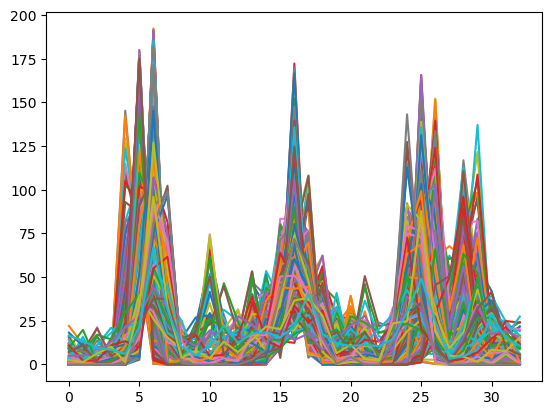

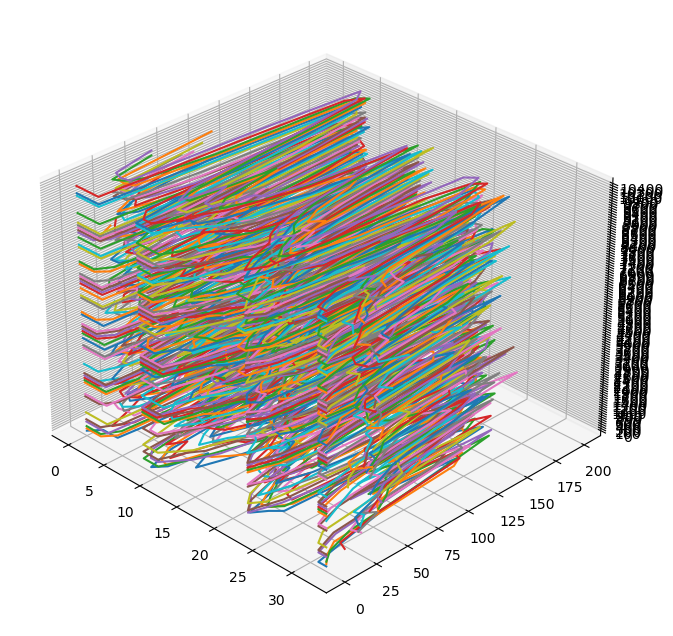

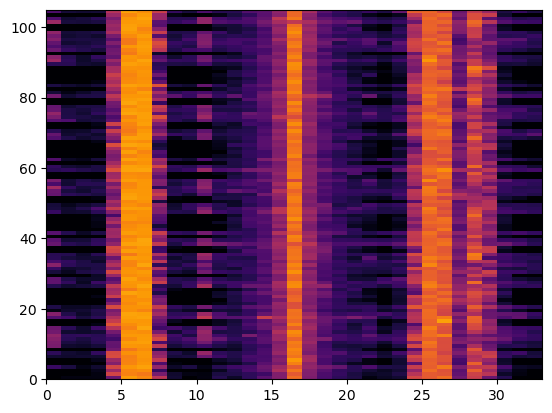

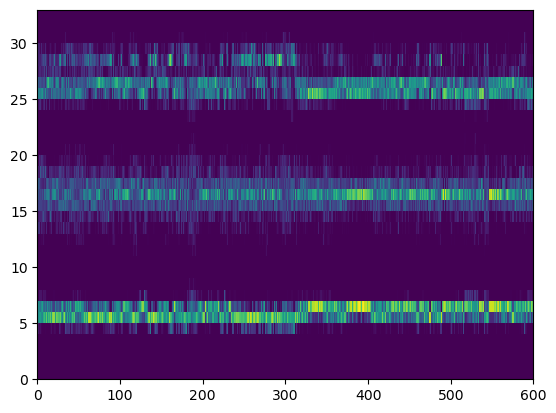

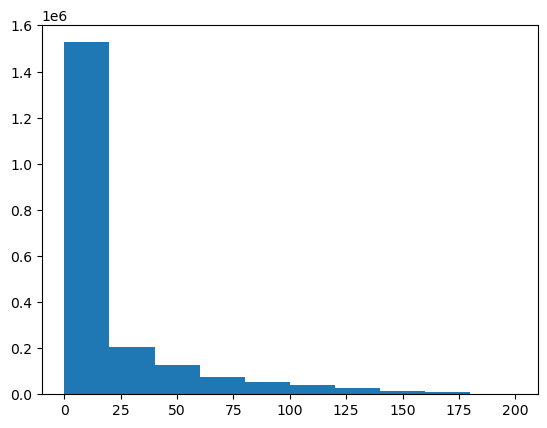

In [75]:
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
%matplotlib inline
for i in range(600): 
  plt.plot(fpfh_traji[6][:,i])

# print()
# (fpfh_traji)
fig = plt.figure(figsize=(200, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=-45)
for i in range(len(fpfh_traji)): 
  ax.plot(range(33), np.max(fpfh_traji[i], axis=1), zs=i*100)

z_ticks = np.arange(0, len(fpfh_traji) * 100, 100)
ax.set_zticks(z_ticks)



fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(np.max(fpfh_traji, axis=-1), cmap="inferno", vmax=250)
  
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(fpfh_traji[4])


fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(fpfh_traji.reshape(-1))

print(np.sum(fpfh_traji[1][:,5]))


In [3]:
import open3d as o3d
from BetaPose import utils, chemtools, representations, data_io; 

# from BetaPose.representations import * 
def array2dataset(data, dtypes):
  """
  Convert a NumPy array to a structured array with specified data types
  """
  length = data.shape[0];
  template = np.zeros(length, dtype=dtypes)
  # template = np.zeros(length)
  for i in range(len(template)):
    template[i] = tuple(data[i])
  return template
print(len(utils.get_hash()))
# data1 = array2dataset(data1, [("repr_md5", str)] + [("", float)]*72); 

# from BetaPose import utils, chemtools, representations, 
from BetaPose import data_io; 
import numpy as np 
hdf = data_io.hdf_operator("/tmp/test.h5", new=True)

# Complex 
datatype1 = [("atom_number", int), ("carbon_number", int), ("donor_number", int), ("acceptor_number", int),
             ("positive_charge", float), ("negative_charge", float), ("pseudo_lj", float), ("pseudo_elec", float),
             ("surface_area", float), ("volume", float), ("mean_radius", float), ("convex_ratio", float)]*6
data1 = np.zeros((1, 73)); 
data1 = array2dataset(data1, [("repr_md5", "S32")] + [(f"repr{(i/7)+1}_{(i%7)+1}", float) for i in range(72)]); 
hdf.create_dataset("repr_form", data1); 
# hdf.append_entry("repr_form", np.zeros((16, 72))); 


datatype2 = [("ID",int), ("repr_md5", "S32"), ("fingerprint",float,(33,600))]
zero_fpfh = np.zeros((1, 33,600))
data2 = np.array([(0, utils.get_hash(), zero_fpfh)], dtype=object)
data2 = data_io.array2dataset(data2, datatype2)
hdf.create_table("FPFH", data2, dtype=datatype2)


datatype3 = [("ID",int), ("repr_md5", "S32"), ("feature_mass",float,(12,12,12))]
feature_0 = np.zeros((1, 12,12,12))
data3 = np.array([(0, utils.get_hash(), feature_0)], dtype=object)
data3 = data_io.array2dataset(data3, datatype3)
hdf.create_table("feature_mass", data3)

hdf.draw_structure()
hdf.close()


32
Created Dataset: repr_form
Created Dataset: FPFH
Created Dataset: feature_mass
####### HDF File Structure #######
$ /FPFH                : Shape-(1,)
$ /feature_mass        : Shape-(1,)
$ /repr_form           : Shape-(1,)
##### END HDF File Structure #####


In [1]:
"""
#################################
# Build a database from scratch #
#################################
from BetaPose import data_io, utils; 
import numpy as np 
hdf = data_io.hdf_operator("/tmp/test.h5", new=True)

# Complex 
datatype1 = [("atom_number", int), ("carbon_number", int), ("donor_number", int), ("acceptor_number", int),
             ("positive_charge", float), ("negative_charge", float), ("pseudo_lj", float), ("pseudo_elec", float),
             ("surface_area", float), ("volume", float), ("mean_radius", float), ("convex_ratio", float)]*6
data1 = np.zeros((1, 73)); 
data1 = data_io.array2dataset(data1, [("repr_md5", "S32")] + [(f"repr{(i/7)+1}_{(i%7)+1}", float) for i in range(72)]); 
hdf.create_dataset("repr_form", data1); 
# hdf.append_entry("repr_form", np.zeros((16, 72))); 


datatype2 = [("ID",int), ("repr_md5", "S32"), ("fingerprint",float,(33,600))]
zero_fpfh = np.zeros((1, 33,600))
data2 = np.array([(0, utils.get_hash(), zero_fpfh)], dtype=object)
data2 = data_io.array2dataset(data2, datatype2)
hdf.create_table("FPFH", data2, dtype=datatype2)


datatype3 = [("ID",int), ("repr_md5", "S32"), ("feature_mass",float,(12,12,12))]
feature_0 = np.zeros((1, 12,12,12))
data3 = np.array([(0, utils.get_hash(), feature_0)], dtype=object)
data3 = data_io.array2dataset(data3, datatype3)
hdf.create_table("feature_mass", data3)

hdf.draw_structure()
hdf.close()
"""

Created Dataset: repr_form
Created Dataset: FPFH
Created Dataset: feature_mass
####### HDF File Structure #######
$ /FPFH                : Shape-(1,)
$ /feature_mass        : Shape-(1,)
$ /repr_form           : Shape-(1,)
##### END HDF File Structure #####


In [12]:
import pytraj as pt 
nc = "/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_001_traj.nc"

tops = "/home/yzhang/zhang/MyTrajs/BFL-1/batch3/C209CsDJQucZ_job_010_END.pdb"
traj = pt.load(nc, top=tops)

print(traj.xyz.shape)
print(traj[1].xyz.shape)

print(dir([]))
print(hasattr([float], "__len__"))

(1001, 21375, 3)
(21375, 3)
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']
True


(10,)


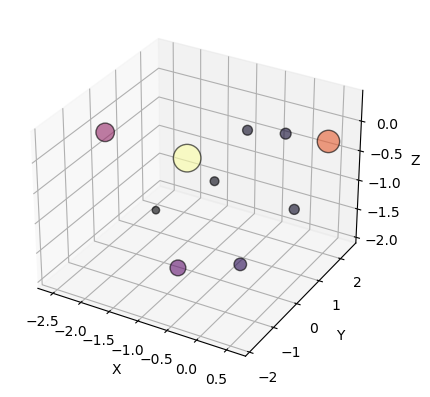

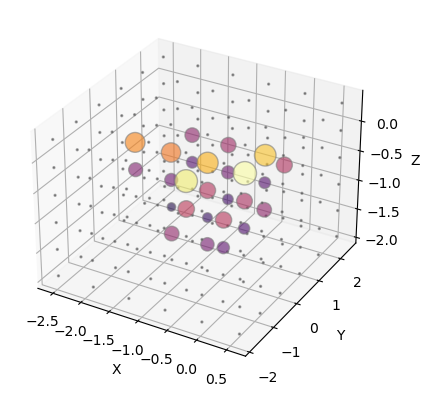

26


In [6]:
import numpy as np 
from BetaPose import utils
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter
def scatter_plot_3d(points, weights):
    """
    Create a 3D scatter plot for an N x 3 array of 3D points.

    Args:
    points (np.array): An array of shape (num_points, 3) containing the 3D coordinates of the points.

    Returns:
    None
    """
    # Extract the x, y, and z coordinates of the points
    x_coords = points[:, 0]
    y_coords = points[:, 1]
    z_coords = points[:, 2]
    print(x_coords.shape)

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_coords, y_coords, z_coords, 
               cmap='inferno', 
               c=weights, 
               s=(weights+0.01)*200, 
               alpha=0.6, 
               edgecolor='k')

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Show the plot
    plt.show()

def plot_grid_density(grid_density, grid, threshold=0.5):
    """
    Create a 3D plot of the grid mesh sized by grid density.

    Args:
    grid_density (np.array): A 3D mesh grid of shape (grid_size, grid_size, grid_size) with the interpolated density.
    threshold (float): A threshold value to filter the density values for visualization.

    Returns:
    None
    """
#     # Filter the density values based on the threshold
#     mask = grid_density > threshold
#     # Get the 3D coordinates of the filtered grid points
#     coords = np.array(np.where(mask)).T
    # Get the corresponding density values for the filtered grid points
#     density = grid_density[mask]

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
#                          coords[:, 0], coords[:, 1], coords[:, 2], 
#                          c=density,  s=density*200, 
                         grid[0], grid[1], grid[2],
                         c=grid_density,  s=(grid_density + 0.01)*200, 
                         alpha=0.6, 
                         cmap='inferno', 
                         edgecolor='gray')

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Show the plot
    plt.show()

np.random.seed(156)
points = np.random.normal(size=(10,3))
weights = np.abs(np.random.normal(size=10))
# print(points)

return_grid, grid = utils.interpolate(points, weights, grid_dims=[6,6,6])

# return_grid = gaussian_filter(return_grid, 0.25)

scatter_plot_3d(points, weights)

plot_grid_density(return_grid, grid, threshold=0.1)

print(np.count_nonzero(return_grid))



In [8]:
trajectories = TrajectoryLoader(trajs, tops); 
for traj in trajectories: 
#   print(i.traj)
  rmsd = pt.rmsd(traj.traj, "@CA");
  
  for idx, frame in enumerate(traj.traj):
#     print(dir(frame))
#     break
#     print(idx)
    if idx % 20 == 0:
      print(f"setting reference to {idx}")
#       traj.traj.top.set_reference(frame)
      refframe = pt.Frame(frame); 
      print(f"{idx: } {refframe} {type(refframe)}")      
      traj.traj.superpose(ref=frame, mask="@CA")
    select = traj.traj.top.select("@CA")
    mask = pt.AtomMask()
    mask.add_selected_indices(select); 
    print("RMSD is:", round(frame.rmsd(refframe, mask),3), rmsd[idx])
    

setting reference to 0
 0 <Frame with 48534 atoms> <class 'pytraj.trajectory.frame.Frame'>
RMSD is: 0.0 6.666775452065998e-07
RMSD is: 0.838 0.8382359528713956
RMSD is: 0.995 0.9953458327350754
RMSD is: 1.225 1.2253018391758899
RMSD is: 1.136 1.136399135396616
RMSD is: 1.235 1.2348146991867752
RMSD is: 1.289 1.2886001706507402
RMSD is: 1.375 1.3751955636806983
RMSD is: 1.318 1.3177174848065711
RMSD is: 1.272 1.2716789599426652
RMSD is: 1.083 1.082589837621042
RMSD is: 1.031 1.0312423910049344
RMSD is: 1.202 1.2021513459845692
RMSD is: 1.304 1.3035355198060585
RMSD is: 1.302 1.3022610340687204
RMSD is: 1.225 1.224530217151613
RMSD is: 1.221 1.2207292853584941
RMSD is: 1.293 1.292857956009089
RMSD is: 1.389 1.3885963403462396
RMSD is: 1.337 1.3367552492412065
setting reference to 20
 20 <Frame with 48534 atoms> <class 'pytraj.trajectory.frame.Frame'>
RMSD is: 0.0 1.3916553639440212
RMSD is: 0.623 1.3449059423552214
RMSD is: 0.979 1.1022016433974564
RMSD is: 1.037 1.173026388012286
RMSD i

In [105]:
a = pt.Topology()
b = pt.Frame()
print(dir(b))

for i in range(10):
  newatom = pt.Atom(name="H", mass=1, resid=i+1, index=i+1, type='H')
  newresidue = pt.Residue(name="BOX", resid=i+1, chainID=i)
  
  a.add_atom(newatom, newresidue)
  coord = [i,i,i]
  coord = np.array([coord]).astype(np.float64); 
  print(coord)
#   = np.array([[]]).astype(np.float64); 
  b.append_xyz(coord)
  
print(b.xyz)
thexyz = np.array([b.xyz]).astype(np.float64); 
thetraj = pt.Trajectory(xyz=thexyz, top=a)
print([i for i in thetraj.top.atoms])
res = [i for i in thetraj.top.residues]
dir(res[1])
print([i.index for i in res])

pt.write_traj("/tmp/test2.pdb", thetraj, overwrite=True)



traj = pt.load("/tmp/test2.pdb")
res = [i for i in traj.top.residues]
# print(dir(res[1]))
print([i.index for i in res])
pt.write_traj("/tmp/test3.pdb", traj, overwrite=True)

['__add__', '__array__', '__class__', '__del__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__isub__', '__iter__', '__itruediv__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__pyx_fuse_0_angle', '__pyx_fuse_0_calc_distance', '__pyx_fuse_0_dihedral', '__pyx_fuse_0swap_atoms', '__pyx_fuse_1_angle', '__pyx_fuse_1_calc_distance', '__pyx_fuse_1_dihedral', '__pyx_fuse_1swap_atoms', '__pyx_fuse_2_angle', '__pyx_fuse_2_calc_distance', '__pyx_fuse_2_dihedral', '__pyx_fuse_2swap_atoms', '__pyx_vtable__', '__radd__', '__reduce__', '__reduce_cython__', '__reduce_ex__', '__repr__', '__rmul__', '__rsub__', '__rtruediv__', '__setattr__', '__setitem__', '__setstate__', '__setstate_cython__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__tmp_idiv__', '__truediv__', '_allocate_force_and_velocity', '

In [46]:
print(np.std(repr_traji, axis=0).reshape((-1, 12)).mean(axis=0).round(2).tolist())

[2.36, 0.91, 0.43, 0.58, 0.09, 0.2, 1.41, 0.32, 24.42, 27.56, 0.56, 0.2]


diff [0. 0. 0. ... 0. 0. 0.]
diff [ 1.16666667e+00  1.66666667e-01  0.00000000e+00 ...  1.09409430e+01
  4.62067746e-02 -5.00000000e-03]
[-0.0696541  -0.38402725 -0.43642278 ...  3.00311591 -0.42189661
 -0.43799464]
diff [-1.00000000e+00 -5.00000000e-01 -1.66666667e-01 ... -1.22001349e+01
 -4.32329981e-02 -3.88888889e-03]
[ 0.20097997  0.32461062  0.40703106 ... -2.56837994  0.43755142
  0.4472797 ]
diff [-2.16666667e+00 -1.00000000e+00 -3.33333333e-01 ... -2.76269635e+01
 -9.33337949e-02  3.88888889e-03]
[ 0.22144186  0.35126251  0.42544573 ... -2.61164862  0.45215164
  0.46297008]
diff [ 1.00000000e+00  3.33333333e-01 -5.00000000e-01 ...  9.04936557e+00
  3.74363614e-02 -2.22222222e-03]
[-0.01487039 -0.26109845 -0.56888354 ...  2.95809921 -0.37038566
 -0.38503325]
diff [ 0.5         0.5        -0.16666667 ... -0.27233139 -0.00321504
  0.00333333]
[ 1.09969139  1.09969139  0.13822634 ... -0.01416307  0.37395589
  0.38339993]
diff [ 0.16666667  0.          0.16666667 ... -5.14520846 -0

[ 0.28367517  0.38922182  0.43144048 ... -3.05291236  0.36309686
  0.39794701]
diff [ 0.33333333  0.16666667  0.16666667 ...  8.51320365 -0.35908427
 -0.26444444]
[-0.21175231 -0.28269078 -0.28269078 ...  3.26985242 -0.50646657
 -0.46618495]
diff [ -2.16666667  -0.66666667  -0.16666667 ... -19.67238635  -1.04775835
  -0.16555556]
[ 0.23685297  0.38518799  0.434633   ... -1.49428791  0.34750183
  0.43474287]
diff [-1.         -0.16666667  0.         ... -5.34414498 -0.31798042
 -0.07777778]
[ 0.07684531  0.39429974  0.45779063 ... -1.57803637  0.33665748
  0.42816155]
diff [ -2.33333333  -0.5         -0.5        ... -24.31565866  -0.44389156
  -0.09916667]
[ 0.20151698  0.42892172  0.42892172 ... -2.52514752  0.43588135
  0.47864066]
diff [ -3.          -0.16666667  -0.33333333 ... -24.34390737  -0.8414397
  -0.39555556]
[ 0.15825245  0.46675149  0.44860449 ... -2.16571521  0.39328084
  0.44182961]
diff [-2.83333333e+00 -6.66666667e-01 -1.00000000e+00 ... -2.90772196e+01
 -1.06232177e-0

diff [ -1.          -0.66666667   0.         ... -10.08438698   0.34431313
   0.14416667]
[-0.07195521  0.0444869   0.27737111 ... -3.2453707   0.39764875
  0.32773232]
diff [ 1.         -0.66666667  0.5        ...  5.60693168  0.76562749
  0.39833333]
[-0.2182985  -0.61556474 -0.33747837 ...  0.87980856 -0.27416347
 -0.36171161]
diff [ 2.33333333  0.16666667  0.16666667 ... 19.29749727  0.81949805
  0.39666667]
[-0.18726363 -0.45866669 -0.45866669 ...  1.93771761 -0.3768911
 -0.42985621]
diff [ 0.66666667 -0.16666667  0.5        ... -2.22059019  0.742745
  0.40611111]
[ 0.00674472 -0.35894238 -0.0663927  ... -1.26025439  0.04012976
 -0.10759345]
diff [ -0.83333333  -1.16666667  -0.16666667 ... -11.83868322   0.71227983
   0.39694444]
[-0.06794814 -0.15821186  0.11257928 ... -3.04809937  0.35059021
  0.26520018]
diff [ 1.83333333  0.33333333 -0.16666667 ... 14.57377655  0.79903406
  0.40083333]
[-0.17451003 -0.40836862 -0.48632148 ...  1.81179801 -0.33576321
 -0.39784498]
diff [  0.   

[-0.25184166 -0.4111549  -0.25184166 ...  3.26284508 -0.38395553
 -0.38862345]
diff [ 1.83333333e+00  6.66666667e-01  3.33333333e-01 ...  3.74246269e+01
  7.36759454e-02 -4.16666667e-03]
[-0.24287637 -0.35251779 -0.38384391 ...  3.10193513 -0.40824609
 -0.41556161]
diff [ 1.66666667  0.33333333  0.83333333 ... 27.85187015 -0.28931888
 -0.15027778]
[-0.11864105 -0.29291186 -0.22756031 ...  3.30384647 -0.37429444
 -0.35612134]
diff [-0.16666667 -0.16666667  0.66666667 ...  5.20777143 -0.66016625
 -0.27805556]
[0.18005595 0.18005595 0.3311542  ... 1.15453777 0.09057565 0.15985916]
diff [ 2.5         0.5         0.83333333 ... 36.55257804 -0.25387997
 -0.11694444]
[-0.13877585 -0.33731863 -0.30422817 ...  3.24167093 -0.41215735
 -0.39856357]
diff [ 2.83333333e+00  5.00000000e-01  6.66666667e-01 ...  4.48787706e+01
  1.04269537e-01 -9.44444444e-03]
[-0.21592083 -0.39664186 -0.38373321 ...  3.04057687 -0.42729192
 -0.43609928]
diff [ 2.          0.5         1.         ... 44.28385893 -0.3583

[-0.42927007 -0.47927579 -0.47927579 ...  1.78858627 -0.37883881
 -0.43831277]
diff [-0.83333333 -0.5        -0.16666667 ... -0.30947882  0.61940248
  0.28083333]
[-0.62260189 -0.49938169 -0.3761615  ... -0.42895352 -0.08558272
 -0.21073839]
diff [ 2.33333333  0.83333333 -0.33333333 ... 36.36685027  0.75017263
  0.27472222]
[-0.2849463  -0.40001231 -0.48950809 ...  2.32578757 -0.40639162
 -0.44286374]
diff [ 1.83333333  1.          0.         ... 27.04515331  0.70952123
  0.28027778]
[-0.28699991 -0.36913732 -0.46770222 ...  2.19800056 -0.39776833
 -0.44007667]
diff [ 1.5         0.5         0.33333333 ... 22.17227624  0.44714046
  0.17833333]
[-0.28502873 -0.41491075 -0.43655776 ...  2.39992835 -0.42177626
 -0.45668947]
diff [ 3.66666667  0.66666667  0.33333333 ... 19.58728279  0.52129287
  0.17166667]
[-0.10012173 -0.40528047 -0.439187   ...  1.51931666 -0.42006783
 -0.45563166]
diff [ 3.          0.66666667  0.16666667 ... 42.31039598  0.77296553
  0.26944444]
[-0.27185112 -0.429541

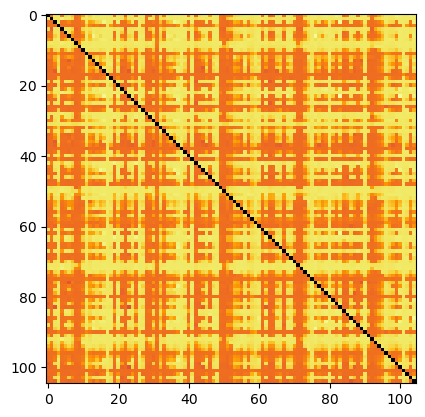

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 

def repr_distance(x1, x2): 
  template = [2.54, 0.91, 0.5, 0.71, 0.11, 0.24, 1.57, 0.31, 23.63, 28.28, 0.54, 0.21]
  # [1,1,1,1,0.1,0.1,1,1,10,15,1,0.1]
  _x1 = x1.reshape((6,-12)); 
  _x2 = x2.reshape((6,-12)); 
  _x_diff = _x1 - _x2; 
  diff = np.mean(_x_diff, axis=0) # /np.asarray(template)
  print("diff", diff)
  mean_data = np.mean(diff)
  std_data = np.std(diff)
  if np.abs(mean_data) < 0.0001 and np.abs(std_data) < 0.0001: 
    return 1
  else: 
    z_normalized_data = (diff - mean_data) / std_data
    norm_data = np.linalg.norm(z_normalized_data)
    normalized_data = z_normalized_data / norm_data
    print(z_normalized_data)

    diff = 1 - diff/np.linalg.norm(diff)
    return np.linalg.norm(diff)

# x1 = repr_traji[0]; 
# x2 = repr_traji[4]; 
# print(repr_distance(x1,x2))
# for i in range(len(repr_traji)): 
#   x1 = repr_traji[1]; 
#   x2 = repr_traji[2]; 
#   final[i][j] = repr_distance(x1,x2)

final = np.zeros((len(repr_traji), len(repr_traji)))
for i in range(len(repr_traji)): 
  for j in range(len(repr_traji)): 
    x1 = repr_traji[i]; 
    x2 = repr_traji[j]; 
    final[i][j] = repr_distance(x1,x2)

import matplotlib.pyplot as plt 

plt.imshow(final, cmap="inferno")


/tmp/ipykernel_11285/2289500503.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_11285/2289500503.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


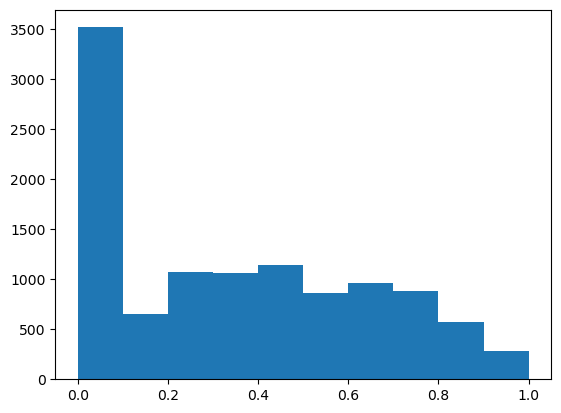

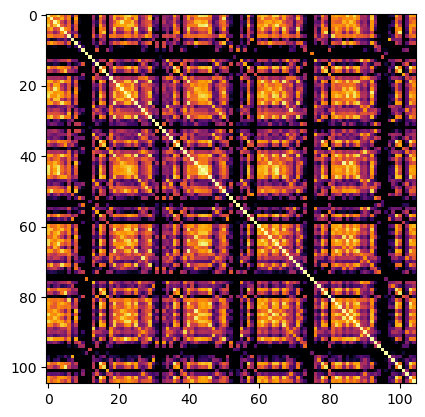

In [37]:
from scipy.spatial import distance
import matplotlib.pyplot as plt 
import numpy as np 


def compute_similarity(array1, array2):
    array1 = np.array(array1).reshape(-1)
    array2 = np.array(array2).reshape(-1)
    
    min_1 = np.min(array1)
    min_2 = np.min(array2)
    max_1 = np.max(array1)
    max_2 = np.max(array2)
    normalized_array1 = (array1 - min_1) / (max_1 - min_1)
    normalized_array2 = (array2 - min_2) / (max_2 - min_2)
#     normalized_array1 = (array1)
#     normalized_array2 = (array2)
    
#     dot_product = np.dot(normalized_array1, normalized_array2)
#     norm_1 = np.linalg.norm(normalized_array1)
#     norm_2 = np.linalg.norm(normalized_array2)
#     similarity = dot_product / (norm_1 * norm_2)
#     similarity = (similarity + 1) / 2

    distance = np.sqrt(np.sum((normalized_array1 - normalized_array2) ** 2))
    # Convert distance to similarity (assuming max possible distance is sqrt(12))
#     print(distance)
    similarity = max(1 - (distance / np.sqrt(1/12)), 0)
    
    return similarity

repr_simi = np.zeros((len(fpfh_traji), len(fpfh_traji)))
for i in range(len(repr_traji)): 
  for j in range(len(repr_traji)): 
    # diff = repr_traji[i] - repr_traji[j]
    sim = compute_similarity(repr_traji[i], repr_traji[j])
    repr_simi[i][j] = sim
#     print(sim)


fig, ax = plt.subplots()
ax.hist(repr_simi.reshape(-1))
fig.show()
fig, ax = plt.subplots()
ax.imshow(repr_simi, cmap="inferno")
fig.show()

In [5]:
print(np.max(final))
print(final)


NameError: name 'final' is not defined

In [4]:
import time
import numpy as np
def FPFH_similarity(features1, features2, threshold=0.5):
    """
    Match FPFH features between two sets and return the indices of matched features.

    Args:
    features1 (np.array): The FPFH features of the first set (33xN1).
    features2 (np.array): The FPFH features of the second set (33xN2).
    threshold (float): The matching threshold (0-1).

    Returns:
    float: The proportion of matched features to the total features.
    """
    # Calculate the Euclidean distance between each pair of features using broadcasting
    distances = np.linalg.norm(features1[:, :, np.newaxis] - features2[:, np.newaxis, :], axis=0)
    #     print(distances.shape)
    # Find the minimum distance and its index along axis 1 (the features2 axis)
    min_distances = np.min(distances, axis=1)
    ####################
    q = 0.05
    # print(f"Quantile {q:4f}: {np.quantile(min_distances, q):.3f}")
    ####################
    # Find the indices where the minimum distance is below the threshold
    matched_indices = np.where(min_distances <= threshold)
    
    return len(matched_indices[0]) / 600
  
def _FPFH_similarity(features1, features2, threshold=0.5):
    """
    Match FPFH features between two sets and return the indices of matched features.

    Args:
    features1 (np.array): The FPFH features of the first set (33xN1).
    features2 (np.array): The FPFH features of the second set (33xN2).
    threshold (float): The matching threshold (0-1).

    Returns:
    float: The proportion of matched features to the total features.
    """
    c = 0
    for i in features1.T: 
      for j in features2.T: 
        disti = np.linalg.norm(i-j)
        if disti < threshold: 
#           print(c)
          c += 1 
          break
    return c/600

  
st = time.perf_counter()
for _ in range(100): 
  sim = FPFH_similarity(fpfh_traji[0], fpfh_traji[0], threshold = 30)
print("Similiarity: ", sim, "; Time", time.perf_counter()-st)
st = time.perf_counter()
for _ in range(100): 
  sim = _FPFH_similarity(fpfh_traji[0], fpfh_traji[0], threshold = 30)
print("Similiarity: ", sim, "; Time", time.perf_counter()-st)
# calculate_similarity(matched, 600)

Similiarity:  1.0 ; Time 2.949179175775498


KeyboardInterrupt: 

10
20
30
40
50
60
70
80
90
100


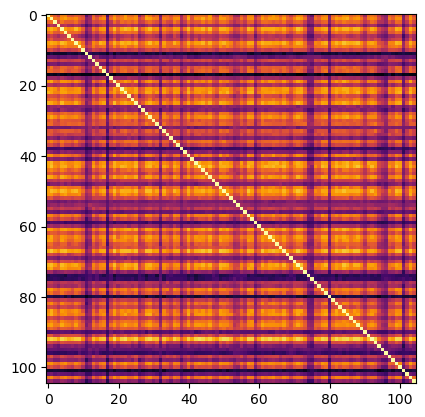

In [45]:
fpfh_final = np.zeros((len(fpfh_traji), len(fpfh_traji)))

for i in range(len(fpfh_traji)):
  if (i+1)%10 == 0: 
    print(i+1)
  for j in range(len(fpfh_traji)):
    fpfh_final[i][j] = FPFH_similarity(fpfh_traji[i], fpfh_traji[j], threshold = 45)

plt.imshow(fpfh_final, cmap="inferno")


(array([ 466.,  844., 2103., 1947., 2479., 1863., 1081.,  129.,    8.,
         105.]),
 array([0.11166667, 0.2005    , 0.28933333, ..., 0.82233333, 0.91116667,
        1.        ]),
 <BarContainer object of 10 artists>)

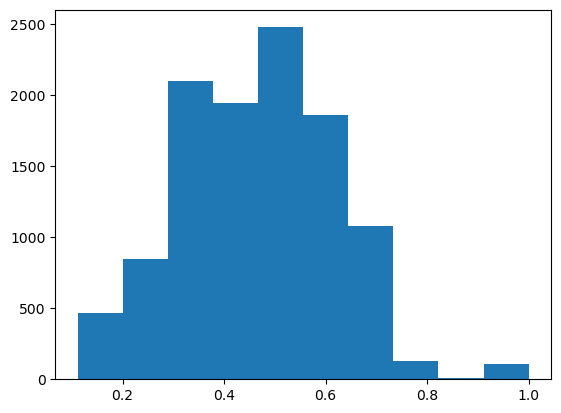

In [44]:
# plt.imshow(1-fpfh_final, cmap="inferno")
plt.hist(fpfh_final.reshape(-1))

In [16]:
import numpy as np
from scipy.stats import spearmanr

# Create two random 2D arrays
arr1 = np.random.random((100, 5))
arr2 = np.random.random((100, 5))

# Compute Pearson correlation coefficients for each pair of corresponding columns
correlation_matrix_pearson = np.corrcoef(arr1.T, arr2.T)[:5, 5:]

print("Pearson correlation coefficients:")
print(correlation_matrix_pearson)

# Compute Spearman rank correlation coefficients for each pair of corresponding columns
correlation_matrix_spearman, _ = spearmanr(arr1, arr2)

print("Spearman rank correlation coefficients:")
print(correlation_matrix_spearman[:5, 5:])


Pearson correlation coefficients:
[[-0.13458623 -0.00701634 -0.08240325  0.13064797  0.04201802]
 [-0.03261897 -0.14405283  0.0363215  -0.08747124 -0.06521998]
 [-0.31734144 -0.0023855   0.01509081 -0.11712761  0.13468825]
 [-0.12574843 -0.08878714  0.00542644  0.09894737 -0.21333692]
 [ 0.1265716  -0.00914924  0.03640216  0.01031988  0.02339147]]
Spearman rank correlation coefficients:
[[-0.12211221  0.00049205 -0.06559856  0.16118812  0.05735374]
 [-0.02489049 -0.1390339   0.03150315 -0.07273927 -0.08541254]
 [-0.30852685 -0.00628863  0.01087309 -0.11072307  0.12178818]
 [-0.10846685 -0.08238824  0.00142814  0.11021902 -0.20850885]
 [ 0.11230723 -0.00784878  0.020042    0.02250225  0.02367837]]


[0.0, 0.0, 0.0, 0.0, 0.0, 82.55735693522149, 117.44264306477854, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.290056585384686, 61.65217219866199, 76.38334503011325, 33.13002046848428, 2.570336304011055, 0.9740694133447834, 0.0, 0.0, 0.0, 0.0, 0.0, 60.94674135104441, 130.86860611917078, 7.326064258198496, 0.8585882715863135, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 88.79729756730879, 111.20270243269124, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.326906585923908, 60.875553463080166, 98.95892259070926, 22.838617360286733, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 74.14679078302635, 111.69509255559316, 14.158116661380495, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 54.86703414231064, 145.13296585768938, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.45364518410963, 49.93503017495696, 87.18803277520605, 44.423291865727364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 96.29126484018238, 98.99358158069461, 4.0626020450678, 0.6525515340552235, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.2615729085987997, 100.03216731762

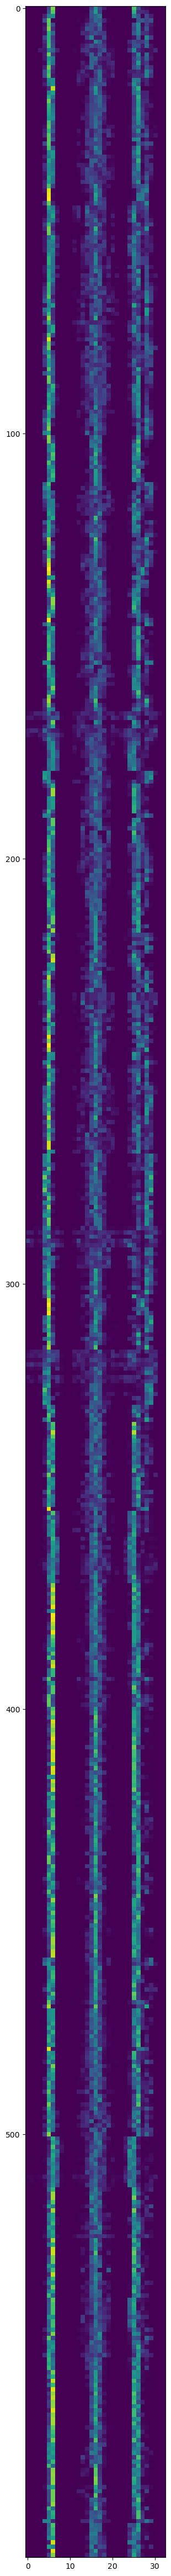

In [25]:
for i in fpfh_traji[2].T: 
  print(i.tolist())
import matplotlib.pyplot as plt 
plt.figure(figsize=(5, 60))
plt.imshow(fpfh_traji[3].T)